# Polynomial Regression 2

Wayne Huynh

# Import Packages

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Import Data

In [2]:
import pandas as pd

# Import dataset
fileName = "PolynomialRegressionData_II.csv"
a8 = pd.read_csv(fileName)
a8

,x,y,z
0,-3.319120,-4.692237,-3397.468030
1,8.812980,9.128139,17492.040881
2,-19.995425,-19.149264,-169660.383385
3,-7.906697,-8.766213,-17145.826565
4,-14.129764,-13.779218,-63847.758980
...,...,...,...
145,-15.700235,-16.744824,-113760.620501
146,-10.971626,-8.920453,-18055.943866
147,8.519559,9.105221,17351.776523
148,2.388679,2.818205,-306.303994


# Plot the Data Points

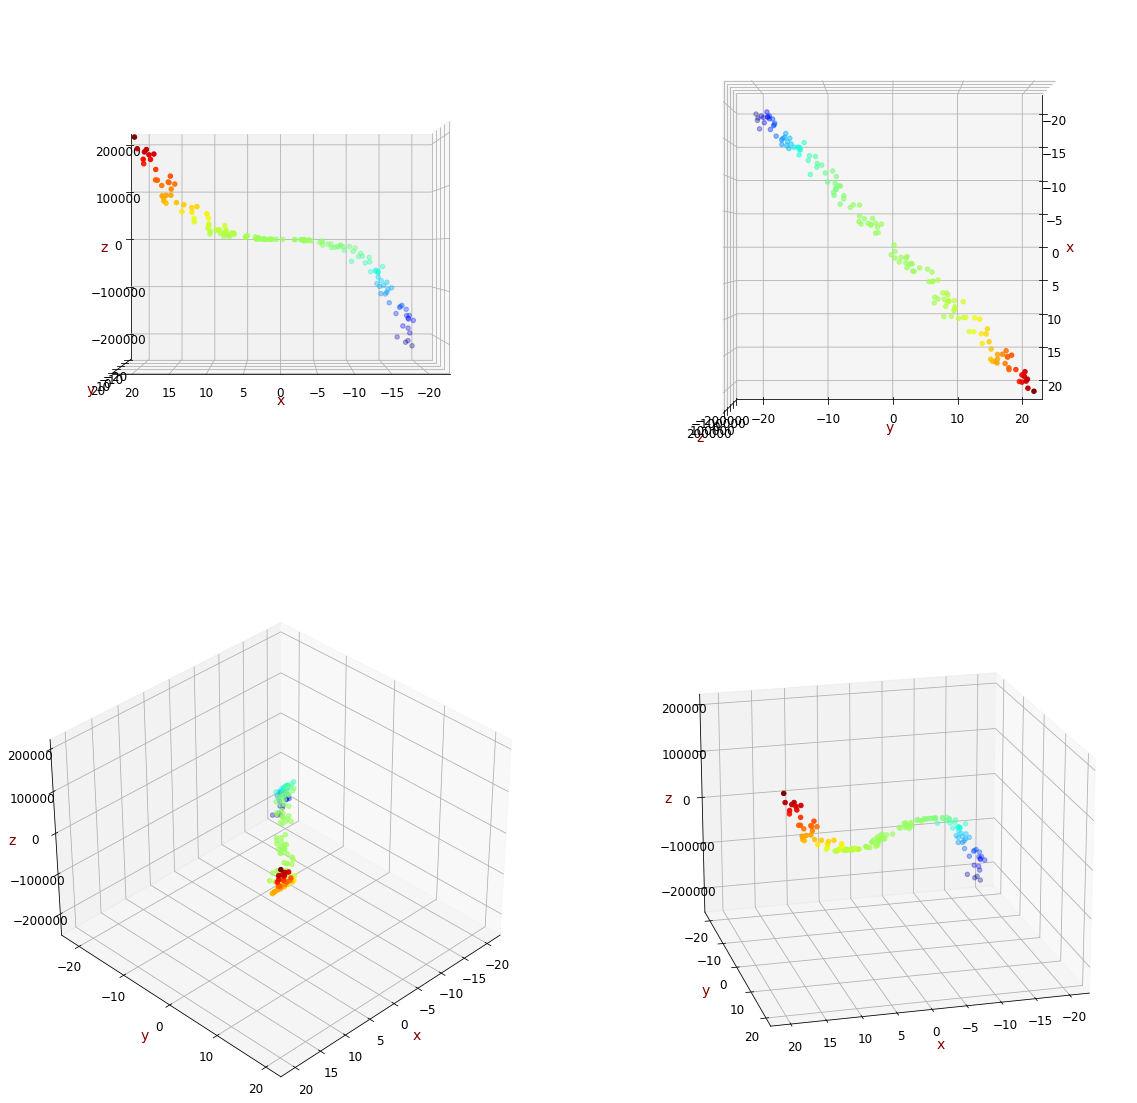

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Extract the data from the DataFrame
xdata = a8['x']
ydata = a8['y']
zdata = a8['z']

# Create a 3D figure with 2x2 subplots
fig = plt.figure(figsize=(20,20))

# Subplot 1
# Plot the data
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
# Set axis labels and font color
ax1.set_xlabel('x', color='maroon')
ax1.set_ylabel('y', color='maroon')
ax1.set_zlabel('z', color='maroon')
# Change viewing angle
ax1.view_init(0, 90)

# Subplot 2
# Plot the data
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
# Set axis labels and font color
ax2.set_xlabel('x', color='maroon')
ax2.set_ylabel('y', color='maroon')
ax2.set_zlabel('z', color='maroon')
# Change viewing angle
ax2.view_init(90, 0)

# Subplot 3
# Plot the data
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
# Set axis labels and font color
ax3.set_xlabel('x', color='maroon')
ax3.set_ylabel('y', color='maroon')
ax3.set_zlabel('z', color='maroon')
# Change viewing angle
ax3.view_init(35, 45)

# Subplot 4
# Plot the data
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
# Set axis labels and font color
ax4.set_xlabel('x', color='maroon')
ax4.set_ylabel('y', color='maroon')
ax4.set_zlabel('z', color='maroon')
# Change viewing angle
ax4.view_init(19, 75)

# Perform Polynomial Features Transformation

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Separate features (x and y) and target (z) into different DataFrames
features = a8[['x', 'y']]
target = a8['z']

# Call PolynomialFeatures function
degree = 3
poly_features = PolynomialFeatures(degree=degree)

# Use fit_transform function on features to generate polynomial features
features_poly = poly_features.fit_transform(features)

# Train Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the model to your training data
model.fit(features_poly, target)

LinearRegression()

# Find the Model Coefficients and the Model Intercept

In [6]:
print("Computed Model Coefficients: ", model.coef_)
print("Computed Model Intercept : ", model.intercept_)

Computed Model Coefficients:  [ 0.         13.11049659 -0.12551237 -0.06438612  0.12522049 -0.06044106
 -0.03261149  0.1003747  -0.10273803 24.03500349]
Computed Model Intercept :  -875.0064816930153


# Find the Line of Best Fit

In [7]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,1000).reshape(-1, 1)
y_fit = x_fit

# Combine x_fit and y_fit arrays horizontally to create a single array with x and y values
xy_data = np.hstack([x_fit, y_fit])

# Transform the xy_data using the poly_features transformer
xy_data_poly = poly_features.transform(xy_data)

# Predict the values of z_fit using the model and the transformed xy_data_poly
z_fit = model.predict(xy_data_poly)

# Plot the Line of Best Fit

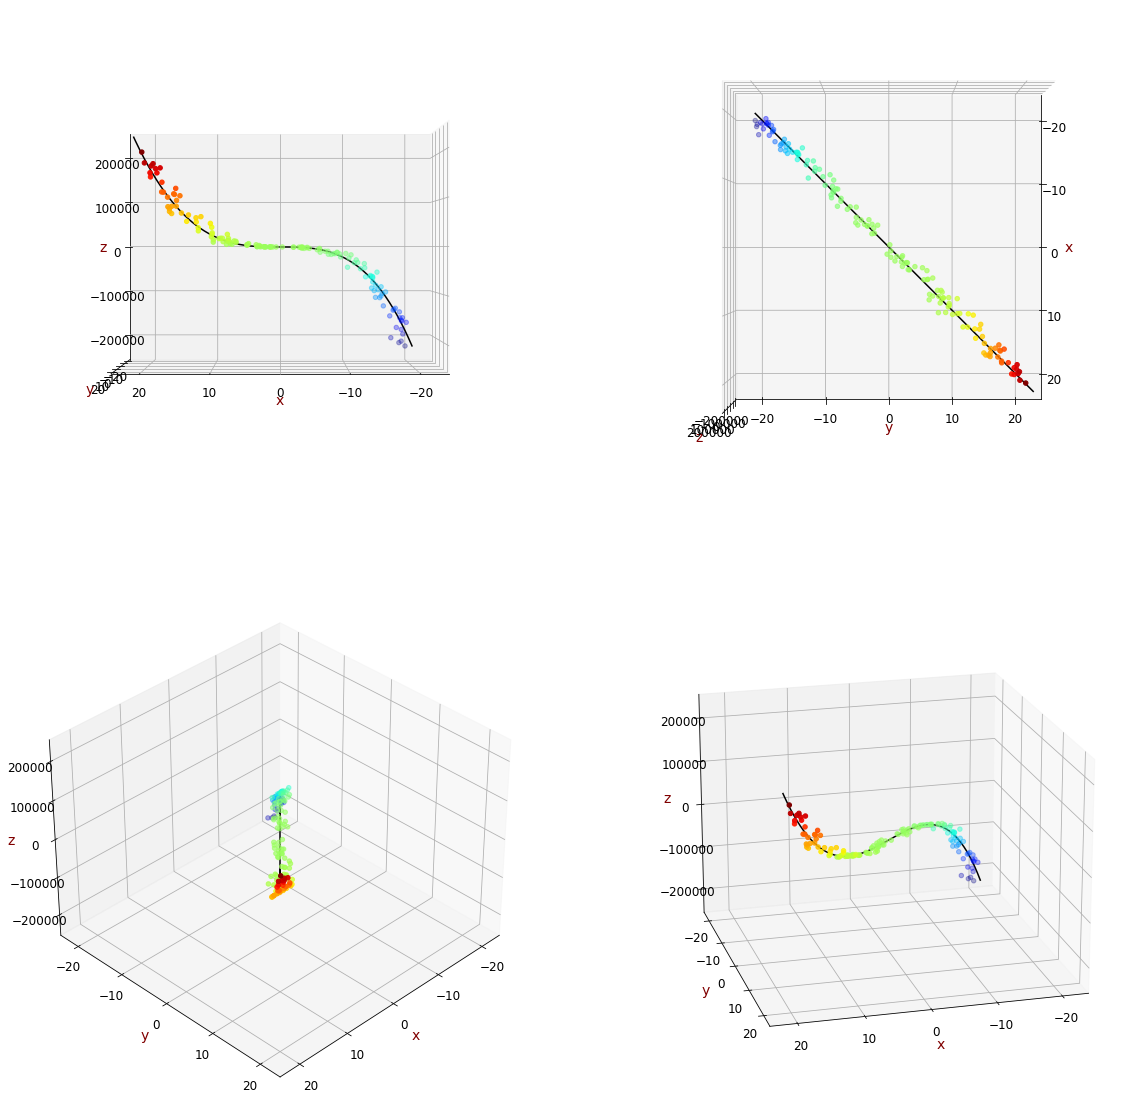

In [8]:
# Create a 3D figure with 2x2 subplots
fig = plt.figure(figsize=(20,20))

# Extract the data from the DataFrame
x = a8['x'].values
y = a8['y'].values
z = a8['z'].values

# Subplot 1
ax1 = fig.add_subplot(221, projection='3d')
# Set axis labels and font color
ax1.set_xlabel('x', color='maroon')
ax1.set_ylabel('y', color='maroon')
ax1.set_zlabel('z', color='maroon')
# Change viewing angle
ax1.view_init(0, 90)
# Plot the data
ax1.scatter3D(x, y, z, c=z, cmap='jet')
ax1.plot3D(x_fit.flatten(), y_fit.flatten(), z_fit.flatten(), 'black')

# Subplot 2
ax2 = fig.add_subplot(222, projection='3d')
# Set axis labels and font color
ax2.set_xlabel('x', color='maroon')
ax2.set_ylabel('y', color='maroon')
ax2.set_zlabel('z', color='maroon')
# Change viewing angle
ax2.view_init(90, 0)
# Plot the data
ax2.scatter3D(x, y, z, c=z, cmap='jet')
ax2.plot3D(x_fit.flatten(), y_fit.flatten(), z_fit.flatten(), 'black')

# Subplot 3
ax3 = fig.add_subplot(223, projection='3d')
# Set axis labels and font color
ax3.set_xlabel('x', color='maroon')
ax3.set_ylabel('y', color='maroon')
ax3.set_zlabel('z', color='maroon')
# Change viewing angle
ax3.view_init(35, 45)
# Plot the data
ax3.scatter3D(x, y, z, c=z, cmap='jet')
ax3.plot3D(x_fit.flatten(), y_fit.flatten(), z_fit.flatten(), 'black')

# Subplot 4
ax4 = fig.add_subplot(224, projection='3d')
# Set axis labels and font color
ax4.set_xlabel('x', color='maroon')
ax4.set_ylabel('y', color='maroon')
ax4.set_zlabel('z', color='maroon')
# Change viewing angle
ax4.view_init(19, 75)
# Plot the data
ax4.scatter3D(x, y, z, c=z, cmap='jet')
ax4.plot3D(x_fit.flatten(), y_fit.flatten(), z_fit.flatten(), 'black')

# Show the plot
plt.show()

# Infer the True Model Parameters

In [9]:
print("True Model Coefficients: ", "[0, 13, 0, 0, 0, 0, 0, 0, 0, 24]")
print("True Model Intercept : ", "-875")

True Model Coefficients:  [0, 13, 0, 0, 0, 0, 0, 0, 0, 24]
True Model Intercept :  -875
